# Kevin Martin & Ravjot Sachdev CIS663 - Wednesday @ 9:00pm EST

Final Project

Dataset used: https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009



**Outline:**
1. [Business Objectives](#Businessobjectives)
2. [Data Understanding](#Dataunderstanding)
3. [Data Preparation](#Datapreparation)
4. [Model Training/Testing](#Modeltrain)
5. [Analysis](#Analysis)
6. [Conclusion](#Conclusion)

# 1. Business Objectives <a class="anchor" id="Businessunderstanding"></a>


## 1.1 Preliminary Assessment<a class="anchor" id="Assessthecurrentsituation"></a>

 ## 1.2 Desired Outputs <a class="anchor" id="Desiredoutputs"></a>


**Business success criteria**



**Data mining success criteria**


 ## 1.3 What Questions Are We Trying To Answer? <a class="anchor" id="QA"></a>

# 2. Data Understanding <a class="anchor" id="Dataunderstanding"></a>

## 2.1 Initial Data Report <a class="anchor" id="Datareport"></a> 

In [1]:
# Import Libraries Required
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from numpy import nan
from sklearn import decomposition, datasets
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, classification_report
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, mean_absolute_error, roc_auc_score, mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_validate, ShuffleSplit, LeaveOneOut, KFold
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

#import keras
#from keras import models
#from keras.models import Sequential
#from keras.layers import Dense
#from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor

In [2]:
#Data source: 
#Source Query location: 
data = './Project_Data/all_accelerometer_data_pids_13.csv'
# reads the data from the file - denotes as CSV, it has no header, sets column headers
df =  pd.read_csv(data, sep=',')
df = df.rename(columns={'time': 'timestamp'})
#df['tiemstamp'] = pd.to_datetime(df.iloc[:,0],unit='ns')
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
df['timestamp'] = df['timestamp'].astype('datetime64[s]')
#df = df['timestamp'].dt.floor('s')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14057567 entries, 0 to 14057566
Data columns (total 5 columns):
 #   Column     Dtype         
---  ------     -----         
 0   timestamp  datetime64[ns]
 1   pid        object        
 2   x          float64       
 3   y          float64       
 4   z          float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 536.3+ MB


In [3]:
def create_frame(usr):
    #vars()[usr]
    maintmp = df[df['pid']==usr]
    datatmp = './Project_Data/usr/' + usr + '.csv'
    dftmp = pd.read_csv(datatmp, sep=',')
    dftmp = dftmp.rename(columns={'time': 'timestamp'})
    dftmp['timestamp'] = pd.to_datetime(dftmp['timestamp'], unit='s')
    dftmp['timestamp'] = dftmp['timestamp'].astype('datetime64[s]')
    df_out = pd.merge(maintmp, dftmp, on = "timestamp", how='inner')
    return df_out

usrs = ['SA0297', 'PC6771', 'BK7610', 'DC6359', 'MC7070', 'MJ8002','BU4707', 'JR8022', 'HV0618', 'SF3079', 'JB3156', 'CC6740']
SA = create_frame(usrs[0])
PC = create_frame(usrs[1])
BK = create_frame(usrs[2])
DC = create_frame(usrs[3])
MC = create_frame(usrs[4])
MJ = create_frame(usrs[5])
BU = create_frame(usrs[6])
JR = create_frame(usrs[7])
HV = create_frame(usrs[8])
SF = create_frame(usrs[9])
JB = create_frame(usrs[10])
CC = create_frame(usrs[11])

In [4]:
frames = [SA, PC, BK, DC, MC, MJ, BU, JR, HV, SF, JB, CC]
df_all = pd.concat(frames)

## 2.2 Describe Data <a class="anchor" id="Describedata"></a>


In [6]:
#This will validate our initial observation of the amount of unique records as well as attributes/column
print('Data shape:')
print(df_all.shape)
print(df_all.info())

Data shape:
(5510, 6)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5510 entries, 0 to 830
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   timestamp    5510 non-null   datetime64[ns]
 1   pid          5510 non-null   object        
 2   x            5510 non-null   float64       
 3   y            5510 non-null   float64       
 4   z            5510 non-null   float64       
 5   TAC_Reading  5510 non-null   float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 301.3+ KB
None


## 2.3 Verify Data Quality <a class="anchor" id="Verifydataquality"></a>


### 2.3.1. Missing Data <a class="anchor" id="MissingData"></a>
The data is extremly complete, without any missing values. As such, no further cleaning needs to be done here.

In [187]:
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("\nThe selections has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns
    
print(missing_values_table(df_all))


The selections has 6 columns.
There are 0 columns that have missing values.
Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []


### 2.3.2. Outliers <a class="anchor" id="Outliers"></a>
To address outliers, we will look at the fields using a standard box-and-whisker plot, observing visually those data points which may need to be removed.

UFuncTypeError: ufunc 'add' cannot use operands with types dtype('<M8[ns]') and dtype('<M8[ns]')

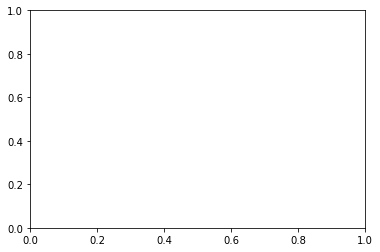

In [8]:
for col in df_all:
    sns.boxplot(x=df_all[col])
    plt.show()

While see what could be considered outliers, note the relative scales for each graph. None of the data points are completely out of line (as in an order of magnitude off), and we feel confident in leaving the dataset untouched in this regard.

## 2.4 Initial Data Exploration  <a class="anchor" id="Exploredata"></a>
For a quick visual look at our key attribute of quality, consider a simple histogram. It is immediately clear that the vast majority of wines are in the right in the middle. We see few wines that are on the edges as very high quality or very poor quality.

### 2.4.1 Distributions  <a class="anchor" id="Distributions"></a>

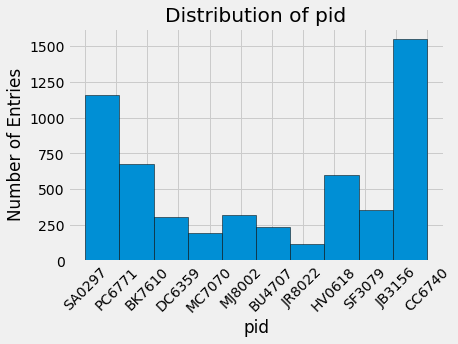

In [31]:
# Histogram
def hist_chart(df, col):
        plt.style.use('fivethirtyeight')
        plt.hist(df[col].dropna(), edgecolor = 'k');
        plt.xlabel(col); plt.ylabel('Number of Entries');
        plt.xticks(rotation=45)
        plt.title('Distribution of '+col);
        plt.show()

        
hist_chart(df_all, 'pid')

### 2.4.2 Correlations  <a class="anchor" id="Correlations"></a>
 

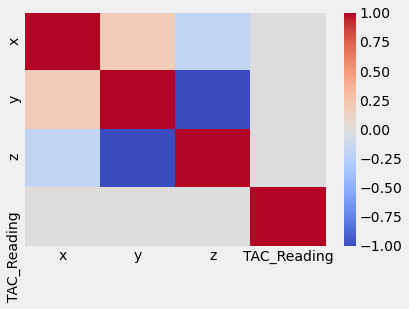

In [21]:
matr = df_all.corr()
sns.heatmap(matr,cmap='coolwarm')

plt.show()

In [22]:
corr_data = df_all[df_all.columns[1:]].corr()['TAC_Reading'][:]
sorted_corr_data = corr_data.sort_values(kind="quicksort")
print(sorted_corr_data)

z             -0.008131
y              0.008131
x              0.009054
TAC_Reading    1.000000
Name: TAC_Reading, dtype: float64


# 3. Data Preperation <a class="anchor" id="Datapreperation"></a>

## 3.1 Data Selection <a class="anchor" id="Selectyourdata"></a>
We will be using 100% of the available data, and splitting it into train/test sets in section 4.

## 3.2 Clean The Data <a class="anchor" id="Cleansethedata"></a>

### 3.2.1 Altering Data Types and Dealing with Zeros <a class="anchor" id="AlteringDatatypes"></a>
There is no need to alter any data types, nor deal with excessive zeros.

### 3.2.2 Dealing With Duplicates <a class="anchor" id="DealingDuplicates"></a>

In [23]:
print('Original shape of data')
print(df_all.shape)
print('Shape after removing duplicates')
df_all.drop_duplicates(keep='first')
print(df_all.shape)

Original shape of data
(5510, 6)
Shape after removing duplicates
(5510, 6)


Note that the shape remains the same after trying to remove duplicates. Thus no duplicate records exist.

## 3.2.3 Missing Values
No missing values to address.

In [24]:
print(df_all.shape)
df.dropna(inplace=True)
print(df_all.shape)

(5510, 6)
(5510, 6)


In [196]:
df_all[df_all.pid=='MC7070'].shape[0]
df_all.pid.shape[0]

5510

In [28]:
#bk_data = inner[inner['pid']=='MC7070']
#time_data = bk_data['TAC_Reading']
#total = inner[inner.pid=='MC7070'].shape[0]
time_data = df_all.timestamp
total = df_all.TAC_Reading.shape[0]
test = int(round(total * .3))
train = total - test
buff = 80

prev_values = time_data.iloc[:12000]
y_train3 = time_data[buff:train]
y_test3 = time_data[train:]
X_train3 = pd.DataFrame([list(time_data[i:i+buff]) for i in range(train - buff)],
                       columns=range(buff,0,-1),index=y_train3.index)
X_test3 = pd.DataFrame([list(time_data[i:i+buff]) for i in range(train - buff,total - buff)],
                       columns=range(buff,0,-1),index=y_test3.index)
    
def plot_pred(pred,title):
    plt.figure(figsize=(17,5))
    plt.plot(prev_values,label='Train')
    plt.plot(y_test3,label='Actual')
    plt.plot(pred,label='Predicted')
    plt.ylabel("TAC")
    plt.title(title,fontsize=20)
    plt.legend()
    plt.show()

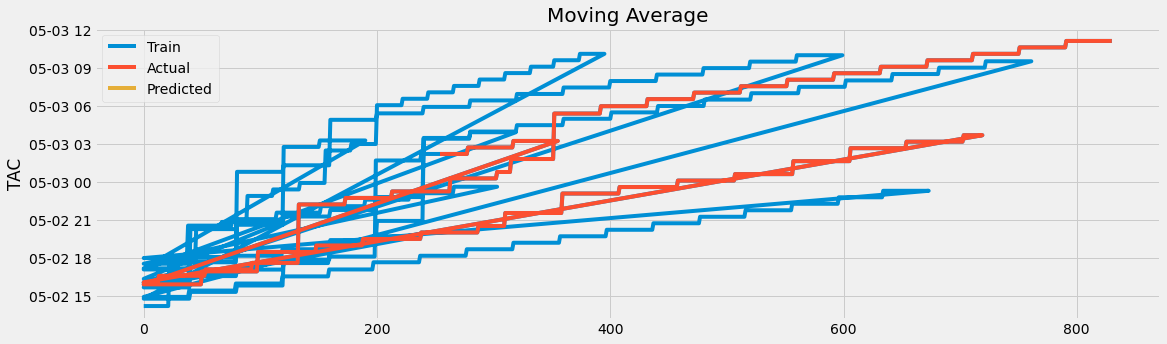

In [26]:
y_ma = X_test3.mean(axis=1)
#print(mse(y_ma,y_test3))
plot_pred(y_ma,"Moving Average")

In [88]:
#total = df[df.ticker=='BTC'].shape[0]
total = inner
test = int(round(total * .3))
train = total - test
buff = 80

prev_values = time_data.iloc[:1200]
y_train3 = time_data[buff:train]
y_test3 = time_data[train:]
X_train3 = pd.DataFrame([list(time_data[i:i+buff]) for i in range(train - buff)],
                       columns=range(buff,0,-1),index=y_train3.index)
X_test3 = pd.DataFrame([list(time_data[i:i+buff]) for i in range(train - buff,total - buff)],
                       columns=range(buff,0,-1),index=y_test3.index)
    
def plot_pred(pred,title):
    plt.figure(figsize=(17,5))
    plt.plot(prev_values,label='Train')
    plt.plot(y_test3,label='Actual')
    plt.plot(pred,label='Predicted')
    plt.ylabel("Stock prices")
    plt.title(title,fontsize=20)
    plt.legend()
    plt.show()

TypeError: cannot perform __mul__ with this index type: DatetimeArray

# 4. Model Training/Testing<a class="anchor" id="Modeltrain"></a>

## 4.1 Multi-Class Testing

In [79]:
"""
'binary':
Only report results for the class specified by pos_label. This is applicable only if targets (y_{true,pred}) are binary.

'micro':
Calculate metrics globally by counting the total true positives, false negatives and false positives.

'macro':
Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.

'weighted':
Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label). This alters ‘macro’ to account for label imbalance; it can result in an F-score that is not between precision and recall.

'samples':
Calculate metrics for each instance, and find their average (only meaningful for multilabel classification where this differs from accuracy_score).
"""

metric_eval = 'macro'

# num_vars = df.select_dtypes(['float64']).columns
num_vars = ['x', 'y', 'z']
print('Columns to check: ', num_vars)
x = inner[num_vars]
y = inner.TAC_Reading

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=16)

scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

def evaluate(model, graph_flag):
    out_mod = model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)
    print ("Accuracy:", accuracy_score(y_test, y_pred)) 
    print("Precision:",metrics.precision_score(y_test, y_pred, average=metric_eval))
    print("Recall:",metrics.recall_score(y_test, y_pred, average=metric_eval))
    print("F1:", metrics.f1_score(y_test,y_pred, average=metric_eval))
    if graph_flag == 1:
        print ("Confusion Matrix: \n", cm)
        sns.heatmap(cm)
    return out_mod

Columns to check:  ['x', 'y', 'z']


In [80]:
gnb = GaussianNB()
gnb_train = evaluate(gnb, 0)

ValueError: Unknown label type: (array([0.00051708, 0.00080448, 0.10446848]),)

In [81]:
%%time
dtc = DecisionTreeClassifier()
evaluate(dtc, 0)

ValueError: Unknown label type: 'continuous'

In [89]:
%%time
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb_train = evaluate(xgb, 0)

ValueError: continuous is not supported

In [133]:
rfc = RandomForestClassifier(n_estimators=10)
rfc_train = evaluate(rfc, 0)

Accuracy: 0.6208333333333333
Precision: 0.3443195448881436
Recall: 0.31320861678004536
F1: 0.3162088354333387


## 4.2 Binary Classification
Classifying wines as either "good" or "bad", with a rating over greater than or equal to 6 indicating good.

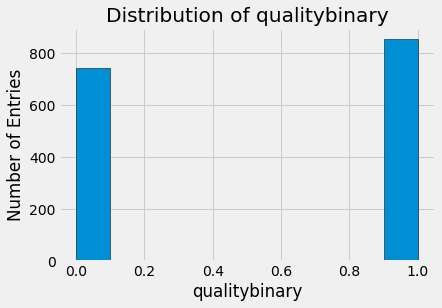

In [134]:
df2 = df.copy()
df2['qualitybinary'] = np.where(df2['quality']>=6,1,0)
hist_chart(df2, 'qualitybinary')

In [135]:
corr_data2 = df2[df2.columns[1:]].corr()['qualitybinary'][:]
sorted_corr_data2 = corr_data2.sort_values(kind="quicksort")
print(sorted_corr_data2)

volatile acidity       -0.321441
total sulfur dioxide   -0.231963
density                -0.159110
chlorides              -0.109494
free sulfur dioxide    -0.061757
pH                     -0.003264
residual sugar         -0.002160
citric acid             0.159129
sulphates               0.218072
alcohol                 0.434751
quality                 0.848279
qualitybinary           1.000000
Name: qualitybinary, dtype: float64


In [136]:
num_vars_bin = df2.select_dtypes(['float64']).columns
print('Columns to check: ', num_vars_bin)
x_bin = df2[num_vars_bin]
y_bin = df2.qualitybinary

x_train_bin, x_test_bin, y_train_bin, y_test_bin = train_test_split(x_bin, y_bin, test_size=0.3, random_state=16)

scaler_bin = StandardScaler().fit(x_train_bin)
x_train_bin = scaler.transform(x_train_bin)
x_test_bin = scaler.transform(x_test_bin)

def evaluate_bin(model, graph_flag):
    out_bin = model.fit(x_train_bin, y_train_bin)
    y_pred_bin = model.predict(x_test_bin)
    cm_bin = confusion_matrix(y_test_bin, y_pred_bin)
    print ("Accuracy:", accuracy_score(y_test_bin, y_pred_bin)) 
    print("Precision:",metrics.precision_score(y_test_bin, y_pred_bin))
    print("Recall:",metrics.recall_score(y_test_bin, y_pred_bin))
    print("F1:", metrics.f1_score(y_test_bin,y_pred_bin))
    if graph_flag == 1:
        print ("Confusion Matrix: \n", cm_bin)
        sns.heatmap(cm_bin)
    return out_bin

Columns to check:  Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')


In [137]:
gnb_bin = GaussianNB()
gnb_train_bin = evaluate_bin(gnb_bin, 0)

Accuracy: 0.7041666666666667
Precision: 0.7142857142857143
Recall: 0.7421875
F1: 0.7279693486590038


In [138]:
dtc_bin = DecisionTreeClassifier()
dtc_train_bin = evaluate_bin(dtc_bin, 0)

Accuracy: 0.7229166666666667
Precision: 0.7269372693726938
Recall: 0.76953125
F1: 0.747628083491461


In [139]:
#xgb_bin = XGBClassifier()
#xgb_train_bin = evaluate_bin(xgb_bin, 0)

In [140]:
rfc_bin = RandomForestClassifier(n_estimators=10)
rfc_train_bin = evaluate_bin(rfc_bin, 0)

Accuracy: 0.7479166666666667
Precision: 0.7824267782426778
Recall: 0.73046875
F1: 0.7555555555555554


In [141]:
#Set up the grid search for a decision tree approach
sc = StandardScaler()
pca = decomposition.PCA()
decisiontree = tree.DecisionTreeClassifier()

# Create a pipeline for the tree
pipe = Pipeline(steps=[('sc', sc),
                       ('pca', pca),
                       ('decisiontree', decisiontree)])

#Set the parameters to test
n_components = list(range(1,x_bin.shape[1]+1,1))
criterion = ['gini', 'entropy']
max_depth = [4,6,8,12]
parameters = dict(pca__n_components=n_components,
                  decisiontree__criterion=criterion,
                  decisiontree__max_depth=max_depth)

#Check best parameters
clf_G = GridSearchCV(pipe, parameters)
clf_G.fit(x_bin, y_bin)

#View The Best Parameters
print('Best Criterion:', clf_G.best_estimator_.get_params()['decisiontree__criterion'])
print('Best max_depth:', clf_G.best_estimator_.get_params()['decisiontree__max_depth'])
print('Best Number Of Components:', clf_G.best_estimator_.get_params()['pca__n_components'])
print(); print(clf_G.best_estimator_.get_params()['decisiontree'])

#Use Cross Validation To Evaluate Model
#CV_Result = cross_val_score(clf_G, x_bin, y_bin, cv=4, n_jobs=-1)
#print(); print(CV_Result)
#print(); print(CV_Result.mean())
#print(); print(CV_Result.std())

Best Criterion: gini
Best max_depth: 6
Best Number Of Components: 10

DecisionTreeClassifier(max_depth=6)


In [142]:
#Create a new algorithm based on optimized grid search parameters
clf2 = DecisionTreeClassifier(criterion="gini", max_depth=6)
clf2_train_bin = evaluate_bin(clf2, 0)

Accuracy: 0.7104166666666667
Precision: 0.7294117647058823
Recall: 0.7265625
F1: 0.7279843444227004


## 4.3 Regression

Predicting the quality score of the wine from 0 to 10, the number can be fractional.  We also round this to the nearest whole number to get an accuracy score for the model.

In [83]:
x = inner[num_vars]
y = inner.TAC_Reading

avval = [np.mean(y) for i in y]
print('Baseline Errors')
print('Root Mean Squared Error: ',  np.sqrt(mean_squared_error(y, avval)))
print('Mean Absolute Error: ', mean_absolute_error(y, avval))

Baseline Errors
Root Mean Squared Error:  0.04573771250601856
Mean Absolute Error:  0.044197910240000006


In [84]:
def evaluate_regression(mdl,mdl_name,x,y,cols):
    x_train, x_test, y_train, y_test = train_test_split(x[cols], y, test_size=0.3, random_state=16)

    scaler = StandardScaler().fit(x_train)
    x_train = scaler.transform(x_train)
    x_test = scaler.transform(x_test)

    
    mdl.fit(x_train,y_train)
    predicted_data = mdl.predict(x_test)
    print(mdl_name, ' using ', cols)
    print('Root Mean Squared Error: ',  np.sqrt(mean_squared_error(y_test, predicted_data)))
    print('Mean Absolute Error: ', mean_absolute_error(y_test, predicted_data))
    print('Accuracy: ', accuracy_score(y_test, predicted_data.round()))
    print()

lg = LinearRegression()
lg_name = 'Linear Regression'    
    
# Linear regression using all columns
evaluate_regression(lg,lg_name,x,y,num_vars)

# Linear regression using higher correlation columns
t = sorted_corr_data[num_vars]
corr_cols = t[abs(t) > .2].index
evaluate_regression(lg,lg_name,x,y,corr_cols)

# Linear regression using only two most correlated columns
t = sorted_corr_data[num_vars]
corr_cols = t[abs(t) > .3].index
evaluate_regression(lg,lg_name,x,y,corr_cols)

Linear Regression  using  ['x', 'y', 'z']
Root Mean Squared Error:  0.05686621801092813
Mean Absolute Error:  0.04057559360298822


ValueError: Classification metrics can't handle a mix of continuous and binary targets

In [153]:
dtr = DecisionTreeRegressor()
dtr_name = 'Decision Tree Regressor'

# Linear regression using all columns
evaluate_regression(dtr,dtr_name,x,y,num_vars)

# Linear regression using higher correlation columns
t = sorted_corr_data[num_vars]
corr_cols = t[abs(t) > .2].index
evaluate_regression(dtr,dtr_name,x,y,corr_cols)

# Linear regression using only two most correlated columns
t = sorted_corr_data[num_vars]
corr_cols = t[abs(t) > .3].index
evaluate_regression(dtr,dtr_name,x,y,corr_cols)

Decision Tree Regressor  using  Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')
Root Mean Squared Error:  0.8403868156985805
Mean Absolute Error:  0.51875
Accuracy:  0.5666666666666667

Decision Tree Regressor  using  Index(['volatile acidity', 'citric acid', 'sulphates', 'alcohol'], dtype='object')
Root Mean Squared Error:  0.8366600265340756
Mean Absolute Error:  0.5083333333333333
Accuracy:  0.575

Decision Tree Regressor  using  Index(['volatile acidity', 'alcohol'], dtype='object')
Root Mean Squared Error:  0.8369838410109115
Mean Absolute Error:  0.5350396825396826
Accuracy:  0.5479166666666667



In [90]:
rfr = RandomForestRegressor()
rfr_name = 'Random Forest Regressor'

# Linear regression using all columns
evaluate_regression(rfr,rfr_name,x,y,num_vars)

# Linear regression using higher correlation columns
t = sorted_corr_data[num_vars]
corr_cols = t[abs(t) > .2].index
evaluate_regression(rfr,rfr_name,x,y,corr_cols)

# Linear regression using only two most correlated columns
t = sorted_corr_data[num_vars]
corr_cols = t[abs(t) > .3].index
evaluate_regression(rfr,rfr_name,x,y,corr_cols)

Random Forest Regressor  using  ['x', 'y', 'z']
Root Mean Squared Error:  0.051702509544206736
Mean Absolute Error:  0.040280857999999996


ValueError: Classification metrics can't handle a mix of continuous and binary targets

In [187]:
param_grid = {'n_estimators': [n for n in range(10,200,10)],
             'max_features': ['auto','sqrt'],
             'min_samples_split': [2,5,10,20],
             'max_depth': [5,10,20,40,80]}

#Check best parameters
clf_rfr = GridSearchCV(rfr, param_grid)

x = df[num_vars]
y = df.quality

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=16)

scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)


clf_rfr.fit(x_train, y_train)

#View The Best Parameters
print('Best n_estimators:', clf_rfr.best_estimator_.get_params()['n_estimators'])
print('Best max_depth:', clf_rfr.best_estimator_.get_params()['max_depth'])
print('Best min_samples_split:', clf_rfr.best_estimator_.get_params()['min_samples_split'])
print('Best max_features:', clf_rfr.best_estimator_.get_params()['max_features'])

rfr_best = clf_rfr.best_estimator_


Best n_estimators: 190
Best max_depth: 20
Best min_samples_split: 2
Best max_features: sqrt


In [188]:
predicted_data = rfr_best.predict(x_test)
print('Root Mean Squared Error: ',  np.sqrt(mean_squared_error(y_test, predicted_data)))
print('Mean Absolute Error: ', mean_absolute_error(y_test, predicted_data))
print('Accuracy: ', accuracy_score(y_test, predicted_data.round()))
print(classification_report(y_test, y_pred.round()))

Root Mean Squared Error:  0.6169848878167059
Mean Absolute Error:  0.44341084225458266
Accuracy:  0.6458333333333334
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.40      0.10      0.15        21
           5       0.64      0.58      0.61       200
           6       0.51      0.73      0.60       196
           7       0.62      0.09      0.16        56
           8       0.00      0.00      0.00         4

    accuracy                           0.56       480
   macro avg       0.36      0.25      0.25       480
weighted avg       0.56      0.56      0.52       480



In the next section we look at if we can evaluate the quality of wine with attributes that can be evaluated outside of a lab environment.  Percent Alcohol is required to be included on all alcoholic beverages so we will use that, and pH testing kits can be purchased and administered at low cost so we will also use that.

In [155]:
athome_cols = ['alcohol','pH']
evaluate_regression(lg,lg_name,x,y,athome_cols)

evaluate_regression(rfr,rfr_name,x,y,athome_cols)

evaluate_regression(dtr,dtr_name,x,y,athome_cols)

Linear Regression  using  ['alcohol', 'pH']
Root Mean Squared Error:  0.7387776615088736
Mean Absolute Error:  0.5818357616666113
Accuracy:  0.5583333333333333

Random Forest Regressor  using  ['alcohol', 'pH']
Root Mean Squared Error:  0.7737749559655775
Mean Absolute Error:  0.5786525177368927
Accuracy:  0.5333333333333333

Decision Tree Regressor  using  ['alcohol', 'pH']
Root Mean Squared Error:  0.9342654076074164
Mean Absolute Error:  0.6320138888888889
Accuracy:  0.4791666666666667



In [163]:
param_grid = {'n_estimators': [n for n in range(10,200,10)],
             'max_features': [None],
             'min_samples_split': [2,5,10,20,30,40],
             'max_depth': [5,10,20,40,80,120]}

#Check best parameters
clf_rfr = GridSearchCV(rfr, param_grid)

x = df[athome_cols]
y = df.quality

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=16)

scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)


clf_rfr.fit(x_train, y_train)

#View The Best Parameters
print('Best n_estimators:', clf_rfr.best_estimator_.get_params()['n_estimators'])
print('Best max_depth:', clf_rfr.best_estimator_.get_params()['max_depth'])
print('Best min_samples_split:', clf_rfr.best_estimator_.get_params()['min_samples_split'])
print('Best max_features:', clf_rfr.best_estimator_.get_params()['max_features'])

rfr_best = clf_rfr.best_estimator_



Best n_estimators: 40
Best max_depth: 5
Best min_samples_split: 5
Best max_features: None


In [164]:
predicted_data = rfr_best.predict(x_test)
print('Root Mean Squared Error: ',  np.sqrt(mean_squared_error(y_test, predicted_data)))
print('Mean Absolute Error: ', mean_absolute_error(y_test, predicted_data))
print('Accuracy: ', accuracy_score(y_test, predicted_data.round()))

Root Mean Squared Error:  0.7277175865544794
Mean Absolute Error:  0.5790219895836011
Accuracy:  0.55


In [182]:
def create_ann_2(activation,units):
    model = Sequential()
    model.add(Dense(units=units, activation=activation,input_shape=(11,)))
    model.add(Dense(units=units, activation=activation))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model


x = df[num_vars]
y = df.quality

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=16)

scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

param_grid = {'activation': ['relu','sigmoid','tanh'],
             'units': [5,10,15,20]}

cv = KFold(n_splits=4, shuffle=True, random_state=16)
# ANN 2
model_ann2 = KerasRegressor(build_fn=create_ann_2, epochs=16, batch_size=10,verbose=0)
grid_ann2 = GridSearchCV(estimator=model_ann2,param_grid=param_grid,cv=cv,n_jobs=-1)
grid_ann2.fit(x_train,y_train)

ann2_cv = grid_ann2.best_estimator_
y_pred = ann2_cv.predict(x_test)



----ANN 2 Hidden Layers----
Root Mean Squared Error:  0.7277175865544794
Mean Absolute Error:  0.5790219895836011
Accuracy:  0.55
---------------------------------


In [186]:
print('----ANN 2 Hidden Layers----')
print('Root Mean Squared Error: ',  np.sqrt(mean_squared_error(y_test, y_pred)))
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred))
print('Accuracy: ', accuracy_score(y_test, y_pred.round()))
print(classification_report(y_test, y_pred.round()))
print('---------------------------------')


----ANN 2 Hidden Layers----
Root Mean Squared Error:  0.6763711703540864
Mean Absolute Error:  0.5254024629791577
Accuracy:  0.55625
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.40      0.10      0.15        21
           5       0.64      0.58      0.61       200
           6       0.51      0.73      0.60       196
           7       0.62      0.09      0.16        56
           8       0.00      0.00      0.00         4

    accuracy                           0.56       480
   macro avg       0.36      0.25      0.25       480
weighted avg       0.56      0.56      0.52       480

---------------------------------


# 5 Analysis <a class="anchor" id="Analysis"></a>


## 5.1 Binary Classification

In order to evaluate the relative success of our classification algorithms, we chose to focus on accuracy. However, we do note that having high scores in both precision and recall (efficiently expressed by F1 as well) is important. Interestingly, our better performing algorithms also had higher F1 scores.

In [ ]:
binary_data=[
    ['Naive Bayes', 'None', 0.704, 0.714, 0.742, 0.727],
    ['Decision Tree', 'None', 0.585, 0.317, 0.337, 0.322],
    ['Decision Tree - Grid Search', 'critereon, max_depth', 0.718, 0.737, 0.734, 0.735],
    ['Gradient Boosting - XGB', 'N/A', 0.770, 0.770, 0.812, 0.790],
    ['Random Forrest', 'n_estimators', 0.756, 0.795, 0.730, 0.761],

]
df_table = pd.DataFrame(binary_data)
# sort table in descending order by accuracy
df_table = df_table.sort_values(by=[2], kind="quicksort", ascending=False)
df_table[2] = pd.Series(["{0:.1f}%".format(val * 100) for val in df_table[2]], index = df_table.index)
df_table[3] = pd.Series(["{0:.1f}%".format(val * 100) for val in df_table[3]], index = df_table.index)
df_table[4] = pd.Series(["{0:.1f}%".format(val * 100) for val in df_table[4]], index = df_table.index)
df_table[5] = pd.Series(["{0:.1f}%".format(val * 100) for val in df_table[5]], index = df_table.index)
fig = go.Figure(data=[go.Table(header=dict(values=['Method','Hyperparameters', 'Accuracy', 'Precision',
                                                  'Recall', 'F1']),
                 cells=dict(values=[df_table[0], df_table[1], df_table[2], df_table[3], df_table[4], df_table[5]]))
                     ])
fig.show()

## 5.2 Regression

When evaluating the regression algorithm, we chose to focus on the square root of the mean squared error (root MSE). This metric is more appropriate for evaluating multi-class accuracy. We also included mean absolute error (MAE) and accuracy as additional benchmarks, but they did not carry as much importance.

Another item set we tested were the features themselves. We ran our three algorithms three times, once with all available features, one with the highly correlated features, and one with only the top two most highly correlated features. To control for this, we did not tune the hyperparameters, instead focusing on how the number of attributes included played a roll.

As one additional check, we ran a grid search on the random forest algorithm to see how much tuning the hyperparameters would compare to feature selection.

In [ ]:
regression_data=[
    ['Linear Regression - All', 'None', 0.681, 0.520, 0.591],
    ['Linear Regression - High Correlations', 'None', 0.679, 0.531, 0.562],
    ['Linear Regression - Top Two', 'None', 0.691, 0.540, 0.560],
    ['Decision Tree - All', 'None', 0.855, 0.514, 0.577],
    ['Decision Tree - High Correlations', 'None', 0.830, 0.506, 0.575],
    ['Decision Tree - Top Two', 'None', 0.845, 0.538, 0.547],
    ['Random Forest - All', 'None', 0.667, 0.471, 0.656],
    ['Random Forest - High Correlations', 'None', 0.671, 0.480, 0.606],
    ['Random Forest - Top Two', 'critereon, max_depth', 0.697, 0.516, 0.552],
    ['Random Forest - Grid Search', 'n_estimators, max_depth, min_samples_split, max_features', 0.621, 0.446, 0.650],

]
df_reg = pd.DataFrame(regression_data)
# sort table in descending order by accuracy
df_reg = df_reg.sort_values(by=[2], kind="quicksort", ascending=True)
#df_reg[2] = pd.Series(["{0:.1f}%".format(val * 100) for val in df_reg[2]], index = df_reg.index)
#df_reg[3] = pd.Series(["{0:.1f}%".format(val * 100) for val in df_reg[3]], index = df_reg.index)
df_reg[4] = pd.Series(["{0:.1f}%".format(val * 100) for val in df_reg[4]], index = df_reg.index)
fig = go.Figure(data=[go.Table(header=dict(values=['Method','Hyperparameters', 'Root MSE', 'MAE', 'Accuracy']),
                 cells=dict(values=[df_reg[0], df_reg[1], df_reg[2], df_reg[3], df_reg[4]]))
                     ])
fig.show()

# 6. Conclusion <a class="anchor" id="Conclusion"></a>

In the binary classification situation, we found that the XGBoosting algorithm performed the best overall. As it is already "pre-tuned", this makes sense. We also found it interesting how much better the decision tree algorithm performed once we optimized the parameters using a grid search. That also makes sense, but the performance improvement was quite dramatic.

With regards to regression, we found that, in general, the more features we included the better. On top of that, the better performing algorithms just generally performed better. The optimized random forest showed, unsurprisingly, the best results in terms of lowest root MSE, but also had the lowest MAE and almost the highest accuracy.

Our overall takeaway is that we are pleased with how our algorithms perform in both scenarios. Classifying a wine as a binary "good" or "bad" should not be difficult given the amount of features to examine. An accuracy and F1 score in the high 70's is a goodbenchmark. We were more pleased with the multi-classification regression algorithms. While the accuracy was lower than in a binary classification, which is to be expected, it's still high enough to get the wines close to their true scores.